<a href="https://colab.research.google.com/github/alaa126458/Data-analysis/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#bank marketing dataset using logistic regression[ Data from a marketing campaign conducted by a bank, with features such as age, job type, and education level, used to predict if a client will subscribe to a term deposit.]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
bank_data=pd.read_csv('bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
print("#numbers of original data "+str(len(bank_data)))

#numbers of original data 11162


<Axes: xlabel='deposit', ylabel='count'>

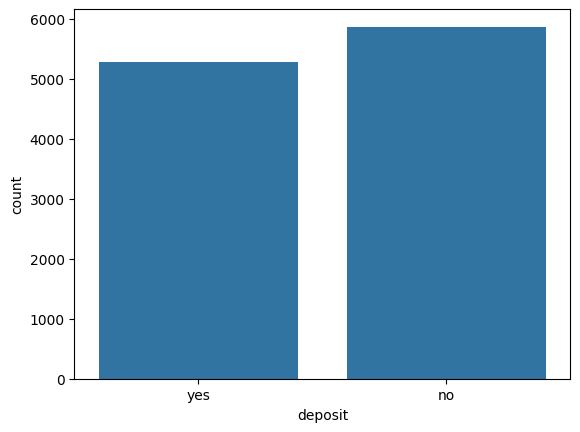

In [5]:
sns.countplot(x='deposit',data=bank_data)

<Axes: xlabel='deposit', ylabel='count'>

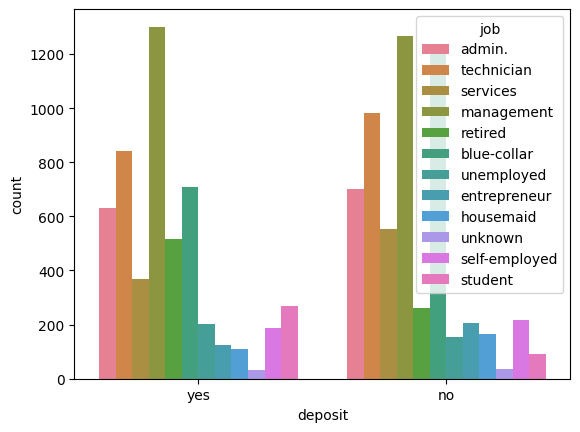

In [6]:
sns.countplot(x='deposit',hue='job',data=bank_data)

<Axes: xlabel='deposit', ylabel='count'>

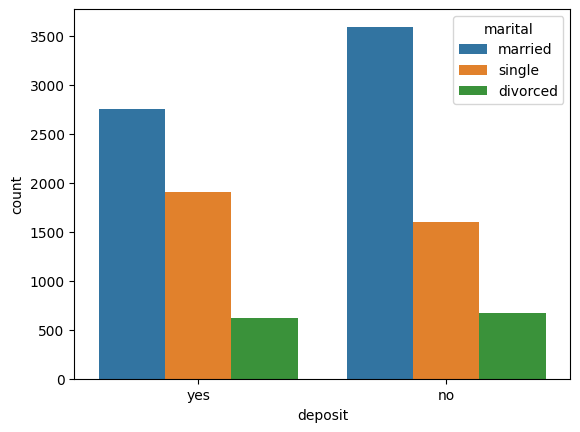

In [7]:
sns.countplot(x='deposit',hue='marital',data=bank_data)

In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
bank_data.isnull()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


<Axes: >

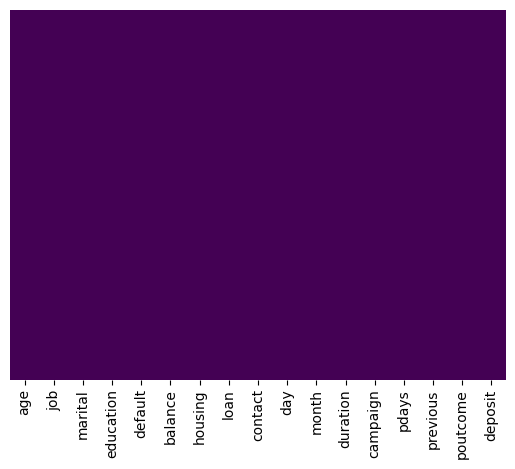

In [14]:
sns.heatmap(bank_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='age', ylabel='marital'>

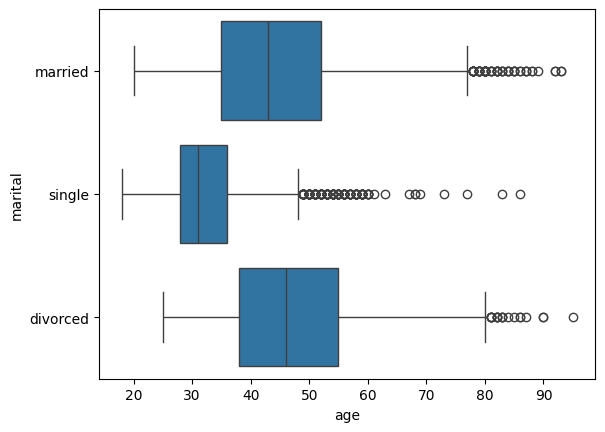

In [16]:
sns.boxplot(x='age',y="marital",data=bank_data)

In [19]:
x=bank_data.iloc[:,0:16].values
y=bank_data.iloc[:,16].values

In [20]:
y

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Convert the subset of the data to numeric values if they are categorical

# Use OneHotEncoder to handle categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Scale the numerical features
x_train_scaled = sc.fit_transform(x_train_encoded.toarray()) # Select all rows and columns from index 0 to 15
x_test_scaled = sc.transform(x_test_encoded.toarray())

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming bank_data is a pandas DataFrame
x = bank_data.drop('deposit', axis=1)
y = bank_data['deposit']
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(exclude=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that includes the preprocessor and the logistic regression model
logmodel = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression())])

# Fit the model on the training data
logmodel.fit(x_train, y_train)

# Make predictions on the test data
predictions = logmodel.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
predictions=logmodel.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n          no       0.81      0.83      0.82      1166\n         yes       0.81      0.78      0.80      1067\n\n    accuracy                           0.81      2233\n   macro avg       0.81      0.81      0.81      2233\nweighted avg       0.81      0.81      0.81      2233\n'

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[972, 194],
       [234, 833]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8083296014330497

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# ROC-AUC Score
y_prob = logmodel.predict_proba(x_test)[:, 1] # Changed logreg to logmodel and X_test to x_test
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[972 194]
 [234 833]]
Classification Report:
              precision    recall  f1-score   support

          no       0.81      0.83      0.82      1166
         yes       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

ROC-AUC Score: 0.9001


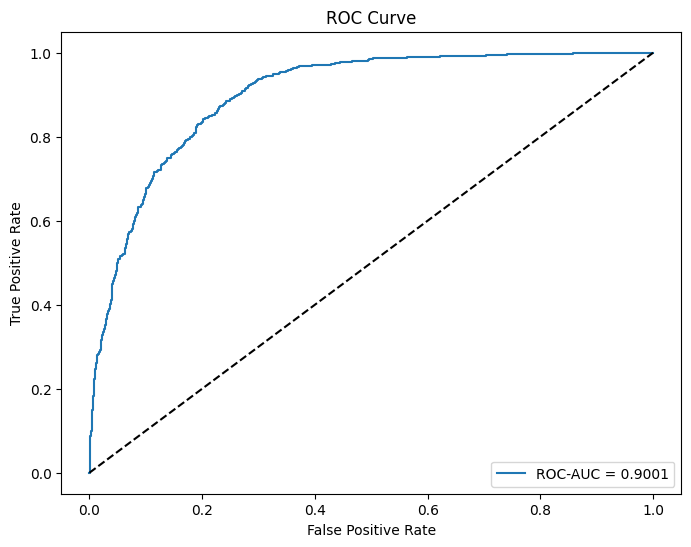

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes') # Added pos_label argument
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()